# Predicting Tips for NYC Yellow Taxi Rides

This data was pulled from [TLC](http://www.nyc.gov/html/tlc/html/about/trip_record_data.shtml) (Taxi and Limousine Commission) in New York City. It contains yellow cab data from June 2019. The yellow cab refers to the classic yellow taxi cab which works throughout the borough, as opposed to the green cabs which operate outside of Manhattan. The goal of this project is to find a model that predicts tip amount, and which features in the data are the best predictors.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import time as t

In [2]:
taxi = pd.read_csv('yellow_tripdata_2019-06.csv')
zone = pd.read_csv('taxi+_zone_lookup.csv')
taxi_test = taxi.copy()

In [3]:
taxi.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2019-06-01 00:55:13   2019-06-01 00:56:17                1   
1         1  2019-06-01 00:06:31   2019-06-01 00:06:52                1   
2         1  2019-06-01 00:17:05   2019-06-01 00:36:38                1   
3         1  2019-06-01 00:59:02   2019-06-01 00:59:12                0   
4         1  2019-06-01 00:03:25   2019-06-01 00:15:42                1   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0            0.0           1                  N           145           145   
1            0.0           1                  N           262           263   
2            4.4           1                  N            74             7   
3            0.8           1                  N           145           145   
4            1.7           1                  N           113           148   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2          3.0    0.5      0.5        0.00           0.0   
1             2          2.5    3.0      0.5        0.00           0.0   
2             2         17.5    0.5      0.5        0.00           0.0   
3             2          2.5    1.0      0.5        0.00           0.0   
4             1          9.5    3.0      0.5        2.65           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  
0                    0.3          4.30                   0.0  
1                    0.3          6.30                   2.5  
2                    0.3         18.80                   0.0  
3                    0.3          4.30                   0.0  
4                    0.3         15.95                   2.5

In [4]:
taxi.describe()

VendorID  passenger_count  trip_distance    RatecodeID  \
count  6.941024e+06     6.941024e+06   6.941024e+06  6.941024e+06   
mean   1.642546e+00     1.567322e+00   3.078505e+00  1.059386e+00   
std    5.018739e-01     1.210831e+00   1.790048e+01  7.349947e-01   
min    1.000000e+00     0.000000e+00   0.000000e+00  1.000000e+00   
25%    1.000000e+00     1.000000e+00   1.000000e+00  1.000000e+00   
50%    2.000000e+00     1.000000e+00   1.680000e+00  1.000000e+00   
75%    2.000000e+00     2.000000e+00   3.140000e+00  1.000000e+00   
max    4.000000e+00     9.000000e+00   4.597722e+04  9.900000e+01   

       PULocationID  DOLocationID  payment_type   fare_amount         extra  \
count  6.941024e+06  6.941024e+06  6.941024e+06  6.941024e+06  6.941024e+06   
mean   1.623034e+02  1.608204e+02  1.292040e+00  1.366414e+01  1.164652e+00   
std    6.638413e+01  7.046478e+01  4.809936e-01  1.323297e+02  1.275345e+00   
min    1.000000e+00  1.000000e+00  1.000000e+00 -3.050000e+02 -2.650000e+01   
25%    1.140000e+02  1.070000e+02  1.000000e+00  6.500000e+00  0.000000e+00   
50%    1.610000e+02  1.620000e+02  1.000000e+00  9.500000e+00  5.000000e-01   
75%    2.330000e+02  2.330000e+02  2.000000e+00  1.500000e+01  2.500000e+00   
max    2.650000e+02  2.650000e+02  4.000000e+00  3.469500e+05  8.476000e+01   

            mta_tax    tip_amount  tolls_amount  improvement_surcharge  \
count  6.941024e+06  6.941024e+06  6.941024e+06           6.941024e+06   
mean   4.950010e-01  2.265934e+00  4.061977e-01           2.984860e-01   
std    1.008513e-01  2.962398e+00  1.797505e+00           2.854512e-02   
min   -5.000000e-01 -8.888000e+01 -3.974000e+01          -3.000000e-01   
25%    5.000000e-01  0.000000e+00  0.000000e+00           3.000000e-01   
50%    5.000000e-01  1.950000e+00  0.000000e+00           3.000000e-01   
75%    5.000000e-01  3.000000e+00  0.000000e+00           3.000000e-01   
max    2.124200e+02  1.624640e+03  8.230000e+02           3.000000e-01   

       total_amount  congestion_surcharge  
count  6.941024e+06          6.941024e+06  
mean   1.974127e+01          2.274467e+00  
std    1.326798e+02          7.289606e-01  
min   -3.058000e+02         -2.500000e+00  
25%    1.130000e+01          2.500000e+00  
50%    1.480000e+01          2.500000e+00  
75%    2.130000e+01          2.500000e+00  
max    3.470350e+05          2.750000e+00

In [5]:
taxi.corrwith(taxi['tip_amount']).sort_values(ascending=False)

tip_amount               1.000000
tolls_amount             0.415130
RatecodeID               0.151571
trip_distance            0.114146
total_amount             0.084424
fare_amount              0.056406
improvement_surcharge    0.037364
VendorID                 0.022998
extra                    0.011730
passenger_count         -0.001549
congestion_surcharge    -0.015685
PULocationID            -0.028174
DOLocationID            -0.031888
mta_tax                 -0.042616
payment_type            -0.464510
dtype: float64

Looking at the descriptive stats, there seems to be a good amount of range. Specifically looking at tip amount, we have a minimum of 0, and a maximum of more than $1000. Tip amount also has some interesting correlations. For example tolls_amount has a .41, where payment_type has a -.46, these will be kept in mind later when looking at feature importance.

# Preprocessing

One of the bigger challenges I faced with this project was dealing with time, specifically how we could convert the datetimes so a number rather than a string. I experimented with a few methods, one being Ordinal Encoders. The idea behind this was that, given the size of the dataset there could repetitive datetimes. The encoder, assigning a number per datetime would reduce the range of values into a more concise range of values. However, the scaling of these values produced poor results which would have tampered with the algorithm. Next, I explored the idea of reducing the features by converting the datetime strings into datetime objects, subtracting the dropoff from the pick up, and use the duration of the ride as my time feature. But I decided to avoid this as I wanted the day and time to be considered in the algorithm. 

Finally, I decided on scaling the datetimes via UNIX timestamps, and then using sklearn's MinMaxScaler to get a more accurate scale than that which was produced by the Ordinal Encoder. 

In [6]:
from sklearn.preprocessing import MinMaxScaler

def convert_to_timestamp(x):
    for i in x:
        t.mktime(i.timetuple())
    return x
def normalize(df):
    scaler = MinMaxScaler(feature_range=(-1, 1))
    dates_scaled = scaler.fit_transform(df)
    return dates_scaled

In [7]:
from sklearn.base import BaseEstimator, TransformerMixin

In [8]:
class NormalTime(BaseEstimator,TransformerMixin):
    def __init__(self, _time=True):
        self._time = _time
        
    def present(self,x):
        updated = x.str.starts_with('2019-')
        return updated
    
    def fit(self,x,y=None):
        return self
        
    def transform(self,x,y=None):
        df = pd.DataFrame(x)
        if self._time:
            y = pd.to_datetime(df.stack()).unstack()
            y = pd.DataFrame(y)
            y = y.apply(convert_to_timestamp)
            i = normalize(y)
            return i
    
        

In [9]:
class NumsOnly(BaseEstimator,TransformerMixin):
    def fit(self,x,y=None):
        return self
    
    def transform(self,x,y=None):
        x = x.drop(columns='store_and_fwd_flag')
        return x

One quick note on the class used for time conversion. As the TLC admits, this data is prepared by a third party and may not be entirely accurate. In the previous notbook I uploaded, the pickup column shows entries with years as far back as 2001, hence I included the present function to filter those out.

In [10]:
from sklearn.compose import ColumnTransformer

pipeline = ColumnTransformer([
    ('time',NormalTime(),[1,2]),('flag',NumsOnly(),[6])],remainder='passthrough') 

In [11]:
taxi = taxi[taxi['tip_amount']>=0]
taxi = taxi[taxi['total_amount']>=0]

As mentioned before, the data admittedly has errors and so I've chosen to remove the negative values. 

In [12]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(taxi, train_size=.6,test_size=.2,random_state=42)

In [13]:
train_label = train_set.iloc[:,13]
train_set_ = train_set.drop(columns= 'tip_amount')

In [14]:
prepared = pipeline.fit_transform(train_set_)

/Users/myles/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype datetime64[ns] were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [15]:
data = pd.DataFrame(prepared)

In [16]:
y = train_set_.columns
y = y.drop('store_and_fwd_flag')

In [17]:
data.columns = y

In [18]:
data

VendorID  tpep_pickup_datetime  tpep_dropoff_datetime  \
0        0.964224              0.963992                    1.0   
1        0.964101              0.963877                    2.0   
2        0.963846              0.963616                    1.0   
3        0.966176              0.965942                    2.0   
4        0.962390              0.962158                    1.0   
...           ...                   ...                    ...   
4156205  0.963334              0.963101                    1.0   
4156206  0.968163              0.967929                    2.0   
4156207  0.964761              0.964534                    2.0   
4156208  0.967943              0.967714                    1.0   
4156209  0.969944              0.969709                    1.0   

         passenger_count  trip_distance  RatecodeID  PULocationID  \
0                    1.0           1.80         1.0         162.0   
1                    1.0          21.80         2.0         132.0   
2                    1.0           1.00         1.0          48.0   
3                    1.0           0.39         1.0         163.0   
4                    2.0           1.30         1.0         158.0   
...                  ...            ...         ...           ...   
4156205              2.0           3.00         1.0         142.0   
4156206              1.0           0.81         1.0          68.0   
4156207              1.0           6.03         1.0         236.0   
4156208              1.0           2.80         1.0         237.0   
4156209              1.0           0.30         1.0         233.0   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  \
0               107.0           1.0         10.0    3.0      0.5   
1                87.0           2.0         52.0    0.0      0.5   
2                68.0           1.0         14.0    3.5      0.5   
3               161.0           1.0          4.0    0.0      0.5   
4               186.0           1.0          9.0    2.5      0.5   
...               ...           ...          ...    ...      ...   
4156205         166.0           1.0         11.0    3.0      0.5   
4156206         234.0           1.0          6.0    0.0      0.5   
4156207         231.0           1.0         26.5    1.0      0.5   
4156208          90.0           1.0         18.0    3.5      0.5   
4156209         162.0           1.0          3.5    2.5      0.5   

         tolls_amount  improvement_surcharge  total_amount  \
0                0.00                    0.3         16.55   
1                6.12                    0.3         61.42   
2                0.00                    0.3         21.95   
3                0.00                    0.3          8.76   
4                0.00                    0.3         14.75   
...               ...                    ...           ...   
4156205          0.00                    0.3         17.75   
4156206          0.00                    0.3         11.16   
4156207          0.00                    0.3         32.80   
4156208          0.00                    0.3         26.30   
4156209          0.00                    0.3          7.48   

         congestion_surcharge  
0                         2.5  
1                         2.5  
2                         2.5  
3                         2.5  
4                         2.5  
...                       ...  
4156205                   2.5  
4156206                   2.5  
4156207                   2.5  
4156208                   2.5  
4156209                   2.5  

[4156210 rows x 16 columns]

# Model Selection

In [19]:
from sklearn import tree

In [20]:
tr = tree.DecisionTreeRegressor(random_state=42)

For machine learning specifically with sklearn, I typically like to start with the default parameters, and work from the results to achieve the best model. Hence, why I only chose random_sate as a defined parameter. I also chose the decision tree as the model due to the nature of the problem. In a parallel notebook (which may find its way on to my github), I chose to use scikit’s Neural Network model. Given the vast amount of data, it seemed an appropriate choice in finding a solution to the problem. However, the model was incapable of getting past a score of 79 on validation. The decision tree, which does not require a large amount of data but can still handle it, unlike a Support Vector Machine, seemed to be a good choice.

In [21]:
reg = tr.fit(prepared,train_label)

In [22]:
test_label = test_set.iloc[:,13]
new_test = test_set.drop(columns ='tip_amount')

In [23]:
new_prepared = pipeline.fit_transform(new_test)

/Users/myles/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype datetime64[ns] were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [24]:
from sklearn.metrics import mean_squared_error as mse

In [25]:
predictions = reg.predict(new_prepared)

In [26]:
new_score = mse(test_label,predictions)
rmse = np.sqrt(new_score)
rmse

0.42299917824375016

In [27]:
reg.score(new_prepared,test_label)

0.9790140475631839

So from the default, we have a model with 97% accuracy, and an rmse of $0.43. Let's take a look at the feature importances.

In [28]:
x = list(reg.feature_importances_)
y = list(data.columns)
feat = {}
for i in range(len(x)):
    feat[y[i]] = x[i]

from operator import itemgetter
sorted(feat.items(), key=itemgetter(1),reverse=True)

[('total_amount', 0.5656103826106411),
 ('payment_type', 0.1959751820246087),
 ('fare_amount', 0.16604356016354793),
 ('trip_distance', 0.03615873048547411),
 ('tolls_amount', 0.02444228055079412),
 ('congestion_surcharge', 0.00534424118721252),
 ('extra', 0.004126357054380115),
 ('RatecodeID', 0.0007065490380638755),
 ('tpep_dropoff_datetime', 0.00036896358008941117),
 ('tpep_pickup_datetime', 0.00030952750111037426),
 ('PULocationID', 0.0003050880069526747),
 ('passenger_count', 0.00018204386818679929),
 ('VendorID', 0.0001760847039230928),
 ('DOLocationID', 0.00017474528155337116),
 ('mta_tax', 7.230687876088109e-05),
 ('improvement_surcharge', 3.957064700860075e-06)]

So our most important features are total_amount, payment_type, and fare_amount. This will be useful for future implimentations, as we can reduce the amount of data requried for the model. But let's take a look at where our model seems to be off.

# Looking at the Results

In [29]:
for i in range(len(predictions)):
    predictions[i]= round(predictions[i],2)

In [30]:
scores = {'label':test_label,'predictions':predictions}

In [31]:
viz = pd.DataFrame(scores)
viz['correct'] = viz['label'] == viz['predictions']

In [32]:
%matplotlib inline

(-5, 40)

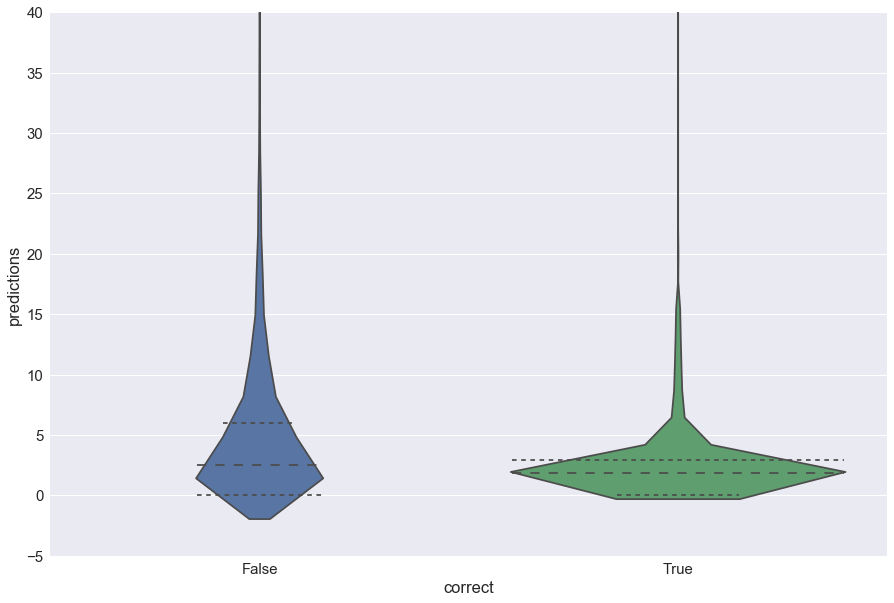

In [33]:
sns.set(rc={'figure.figsize':(15,10)},font_scale=1.5)
sns.violinplot(x='correct',y='predictions',data=viz, inner="quartile")
plt.ylim(-5,40)

For this violinplot, the results are graphed with equal area to better undestand the quartiles as opposed to count which would leave the False results unreadable. Another modification made to this representation is the y axis limit. Both the label and prediction go into the 100's making the meat of the data unreadable. 

In [34]:
incorrect = viz[viz['predictions']!=viz['label']]
incorrect.describe()

label   predictions
count  37597.000000  37597.000000
mean       5.370173      4.662600
std        7.873838      8.060345
min        0.000000      0.000000
25%        2.450000      0.000000
50%        2.460000      2.500000
75%        6.000000      6.000000
max      336.170000    330.000000

# Conclusion

While this project has produced good results, I am patiently waiting for the commission to release the data for the following months as true validation set. However, this acts a first step in understanding how tips are given. As of now I am satisfied with the model at hand. But I'll be working on generating data for forward propogation, with greater variance, until the data released by the commission is available.